In [1]:
import numpy as np
from scipy.stats import norm, uniform, expon, cauchy, bernoulli, sem
from scipy.stats.mstats import winsorize
from scipy import mean, std
import matplotlib.pyplot as plt

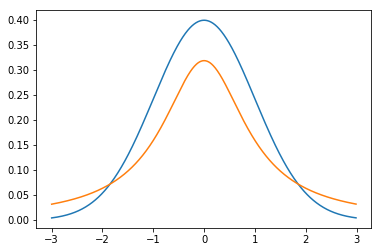

In [12]:
z = np.arange(-3, 3, 0.01)
plt.plot(z, norm.pdf(z))
plt.plot(z, cauchy.pdf(z))
plt.show()

In [2]:
def population_plot(population, sample_size=1000, winsor=False):
    sample = population.rvs(size=sample_size)
    if winsor:
        sample = winsorize(sample, 0.05)
    padding = (max(sample) - min(sample)) / 4.0
    resolution = (max(sample) - min(sample)) / 100.0
    z = np.arange(min(sample) - padding, max(sample) + padding, resolution)
    plt.plot(z, population.pdf(z))
    plt.show()

def population_sample_plot(population, sample_size=1000, winsor=False):
    sample = population.rvs(size=sample_size)
    if winsor:
        sample = winsorize(sample, 0.05)
    padding = (max(sample) - min(sample)) / 4.0
    resolution = (max(sample) - min(sample)) / 100.0
    z = np.arange(min(sample) - padding, max(sample) + padding, resolution)
    plt.scatter(range(sample_size), sample)
    plt.show()

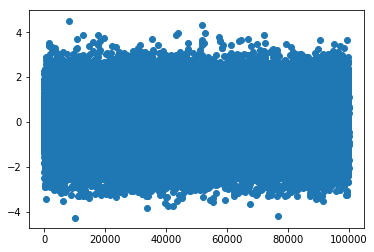

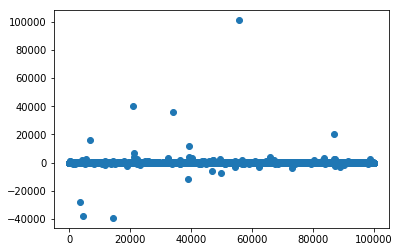

In [13]:
population_sample_plot(norm, sample_size=100*1000, winsor=False)
population_sample_plot(cauchy, sample_size=100*1000, winsor=False)

In [4]:
def population_sample_mean_plot(population, sample_size=1000, num_samples=1000):
    sample_means = [mean(population.rvs(size=sample_size)) for _ in range(num_samples)]
    mn = min(sample_means)
    mx = max(sample_means)
    rng = mx - mn
    padding = rng / 4.0
    resolution = rng / 100.0
    z = np.arange(mn - padding, mx + padding, resolution)
    plt.plot(z, norm(mean(sample_means), std(sample_means)).pdf(z))
    plt.hist(sample_means, density=True, alpha=0.5)
    plt.show()

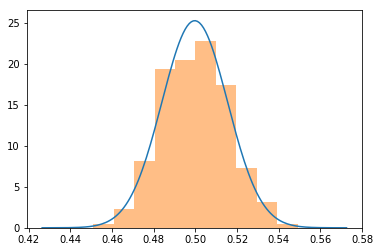

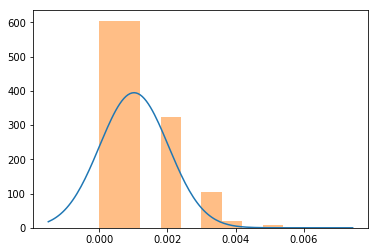

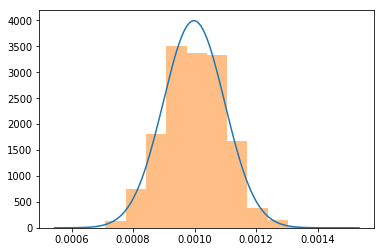

In [5]:
population_sample_mean_plot(bernoulli(p=0.5))
population_sample_mean_plot(bernoulli(p=0.001))
population_sample_mean_plot(bernoulli(p=0.001), sample_size=100*1000)

In [6]:
def population_running_mean_plot(population, sample_size=10*1000):
    sample = population.rvs(size=sample_size)
    step_size = int(len(sample)/100)
    running_stats = []
    for i in range(100, len(sample), step_size):
        running_sample = sample[:i]
        running_stats.append(([i, mean(running_sample), sem(running_sample)]))
    x = [x[0] for x in running_stats]
    y = [x[1] for x in running_stats]
    envelope_min = [x[1] - x[2] for x in running_stats]
    envelope_max = [x[1] + x[2] for x in running_stats]
    plt.plot(x, y)
    plt.fill_between(x, envelope_min, envelope_max, alpha=0.2)
    plt.show()

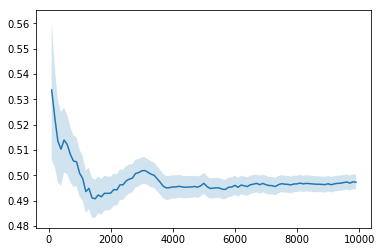

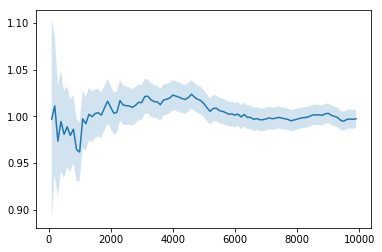

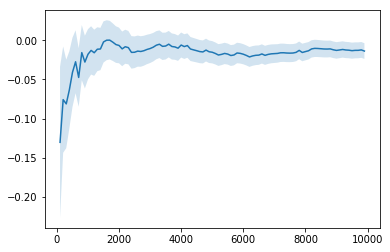

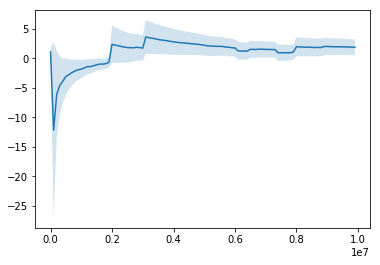

In [7]:
population_running_mean_plot(uniform)
population_running_mean_plot(expon)
population_running_mean_plot(norm)
population_running_mean_plot(cauchy, sample_size=10*1000*1000)

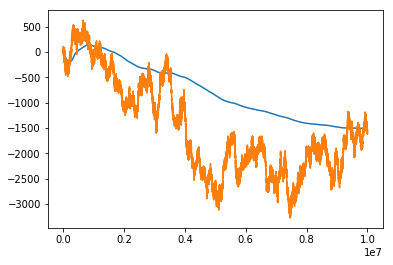

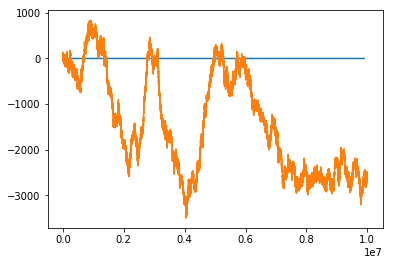

In [8]:
from math import sqrt

def random_walk_draw(num_steps):
    return np.cumsum(norm().rvs(size=num_steps))
    #return np.cumsum(2*(bernoulli(p=0.5).rvs(size=num_steps)-0.5))

def random_walk_running_mean_plot(sample_size=10*1000, martingale_normalize=False):
    sample = random_walk_draw(num_steps=sample_size)
    step_size = int(len(sample)/100)
    running_stats = []
    for i in range(100, len(sample), step_size):
        running_sample = sample[:i]
        if martingale_normalize:
            m = mean(running_sample)/sqrt(i)
        else:
            m = mean(running_sample)
        running_stats.append(([i, m, sem(running_sample)]))
    x = [x[0] for x in running_stats]
    y = [x[1] for x in running_stats]
    envelope_min = [x[1] - x[2] for x in running_stats]
    envelope_max = [x[1] + x[2] for x in running_stats]
    plt.plot(x, y)
    plt.plot(sample)
    plt.fill_between(x, envelope_min, envelope_max, alpha=0.2)
    plt.show()

random_walk_running_mean_plot(sample_size=10*1000*1000, martingale_normalize=False)
random_walk_running_mean_plot(sample_size=10*1000*1000, martingale_normalize=True)

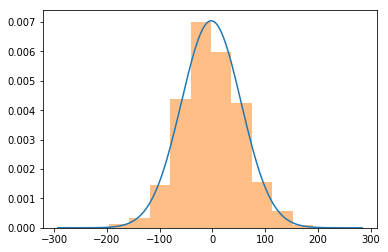

In [9]:
def random_walk_sample_mean_plot(sample_size=1000, num_samples=1000):
    sample_means = [mean(random_walk_draw(num_steps=sample_size)) for _ in range(num_samples)]
    mn = min(sample_means)
    mx = max(sample_means)
    rng = mx - mn
    padding = rng / 4.0
    resolution = rng / 100.0
    z = np.arange(mn - padding, mx + padding, resolution)
    plt.plot(z, norm(mean(sample_means), std(sample_means)).pdf(z))
    plt.hist(sample_means, density=True, alpha=0.5)
    plt.show()

random_walk_sample_mean_plot(sample_size=10*1000, num_samples=1000)